In [ ]:
import cv2
import requests
import numpy as np

def loc_sys(img:np.ndarray) -> np.ndarray:
    # preprocess
    kernel = np.ones((5,5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=2)
    frame_HSV = cv2.cvtColor(img_erosion, cv2.COLOR_BGR2HSV)
    # (2, 29), (54, 255), (74, 255)
    frame_threshold = cv2.inRange(frame_HSV, (2, 40, 74), (30, 255, 255))
    # processed_img2 = cv2.bitwise_and(img1,img1, mask=frame_threshold)
    # get contours
    cnts = cv2.findContours(frame_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    # find contour with max area
    max = 0
    idx = -1
    for i,c in enumerate(cnts):
        area = cv2.contourArea(c)
        if area > max:
            idx = i
            max = area
    blue_box = cnts[idx]
    # return its center point
    x,y,w,h = cv2.boundingRect(blue_box)
    # f_img = cv2.drawContours(processed_img2, [blue_box], -1, (255,0,0), 2)
    # plt.figure(figsize=(12,12))
    # plt.imshow(f_img[100:200,350:450])
    return (x+w/2,y+h/2)

In [1]:
count=0
r = requests.get('http://10.20.2.114/asp/video.cgi', auth=('admin', 'admin'), stream=True)
if(r.status_code == 200):
    bytes1 = bytes()
    for chunk in r.iter_content(chunk_size=1024):
        count+=1
        bytes1 += chunk
        a = bytes1.find(b'\xff\xd8')
        b = bytes1.find(b'\xff\xd9')
        if a != -1 and b != -1:            
            if count%20==0:
                jpg = bytes1[a:b+2]
                bytes1 = bytes1[b+2:]
                i = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)
                # specify desired output size 
                width = 720
                height = 1280
                # specify conjugate x,y coordinates (not y,x)
                input = np.float32([[2,370], [589,51], [1264,66], [806,719]])
                output = np.float32([[0,0], [width-1,0], [width-1,width-1], [0,width-1]])

                # compute perspective matrixbytes1 = bytes1[b+2:]
                i = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)
                # specify desired output size 
                width = 720
                height = 1280
                matrix = cv2.getPerspectiveTransform(input,output)

                # do perspective transformation setting area outside input to black
                imgOutput = cv2.warpPerspective(i, matrix, (width,width), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

                cv2.imshow('Track Image', imgOutput)
                cv2.imwrite("TrackImage2.png",imgOutput)
            key=cv2.waitKey(1) 
            if key == 27 or key ==113:
                break
            else:
                if key!=-1:
                    print(key)
                pass
                
else:
    print("Received unexpected status code {}".format(r.status_code))

/tmp/ipykernel_28132/3159760170.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  i = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)
/tmp/ipykernel_28132/3159760170.py:26: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  i = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)


In [10]:
import cv2
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
img=cv2.imread("TrackImage.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
# cv2.imshow("tm",img)
# key=cv2.waitKey(0) 


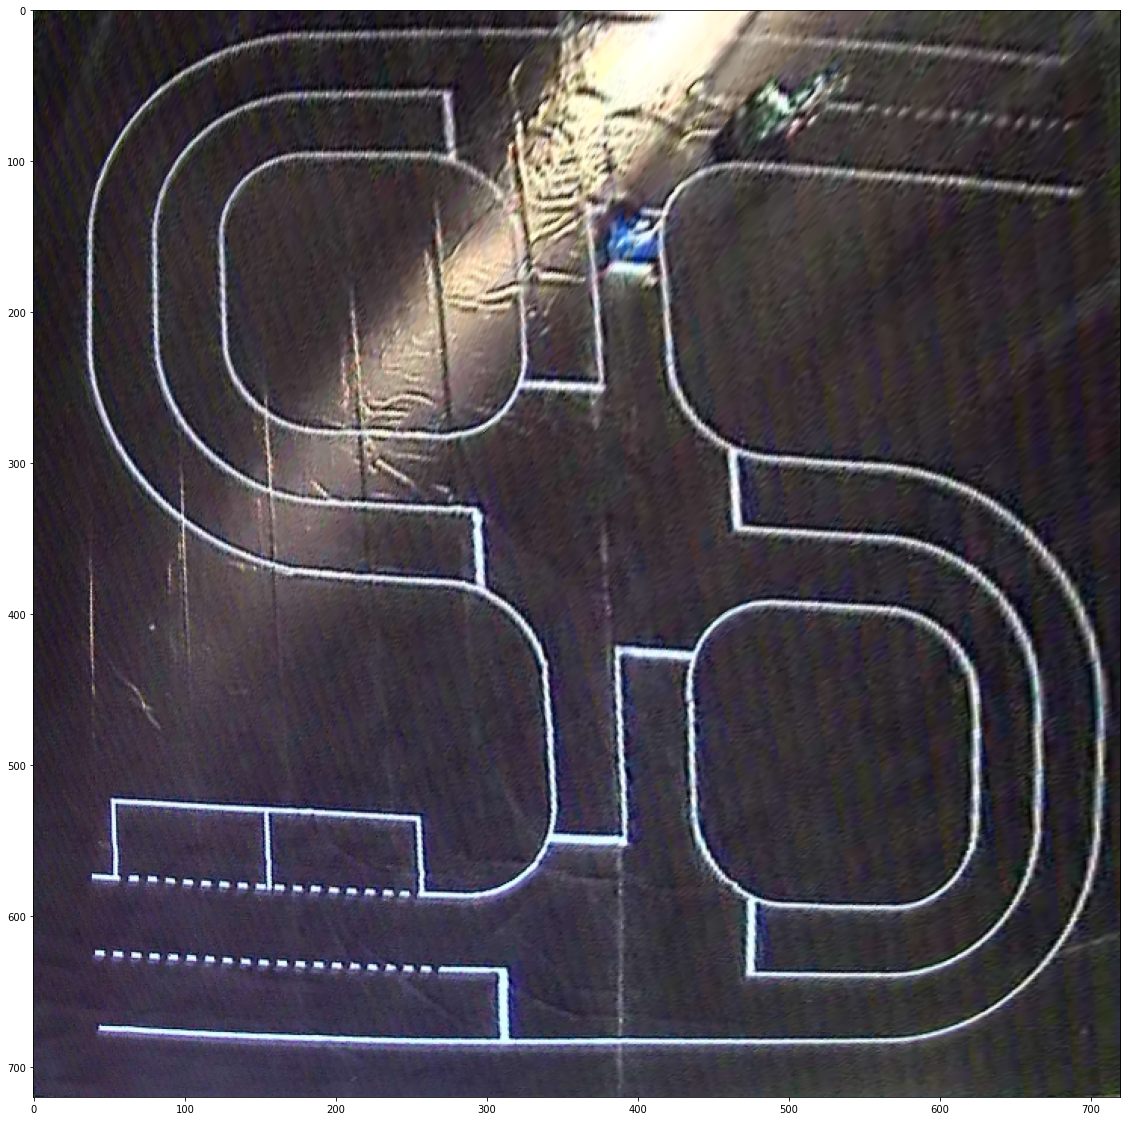

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(img)

In [13]:
import cv2
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
img=cv2.imread("TrackImage2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
# cv2.imshow("tm",img)
# key=cv2.waitKey(0) 


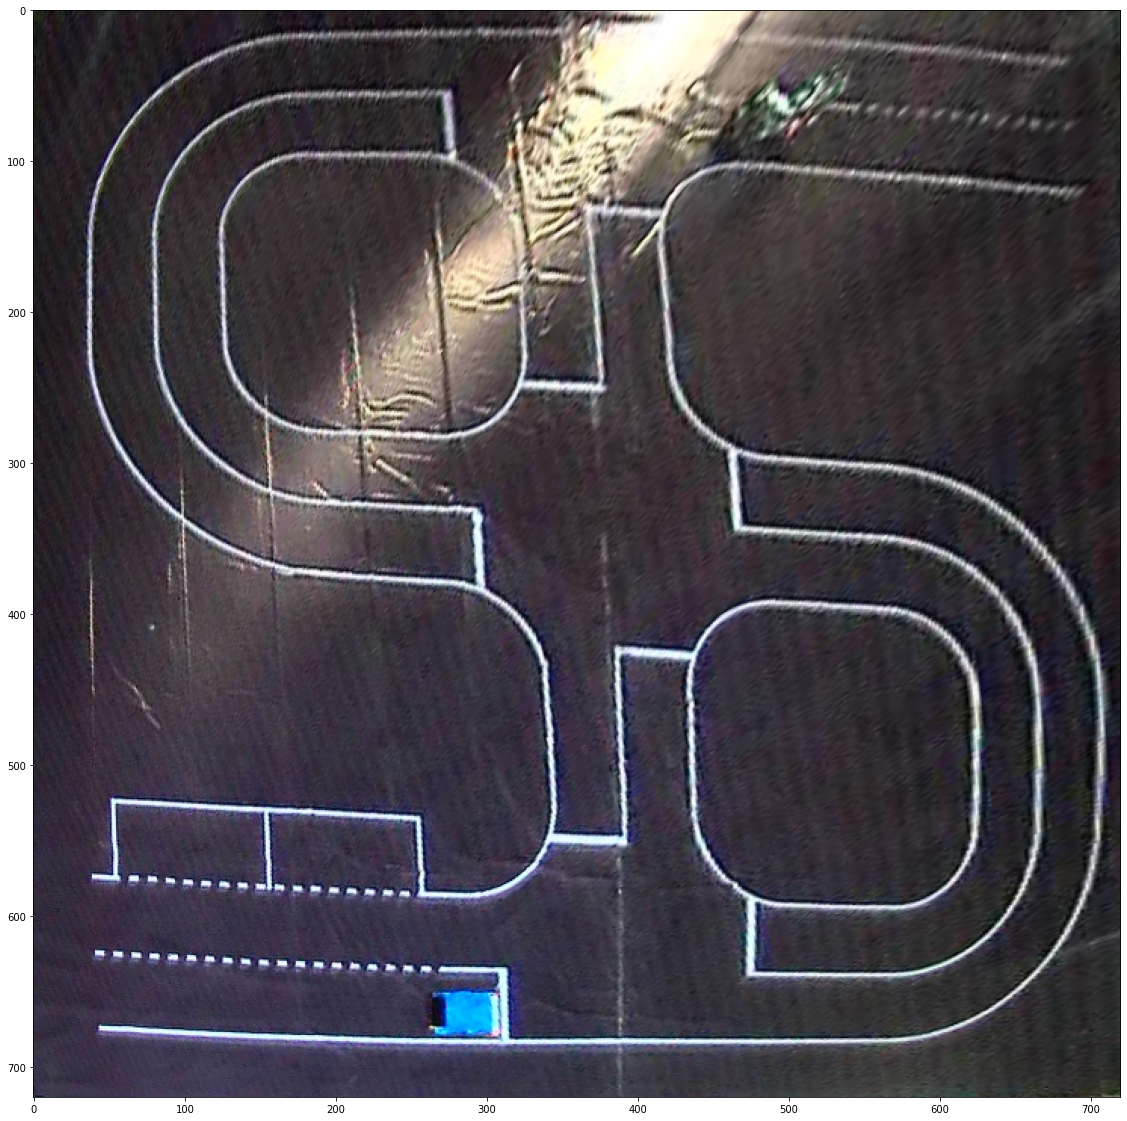

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(img)

### Just in Case thing dont work out 

In [63]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

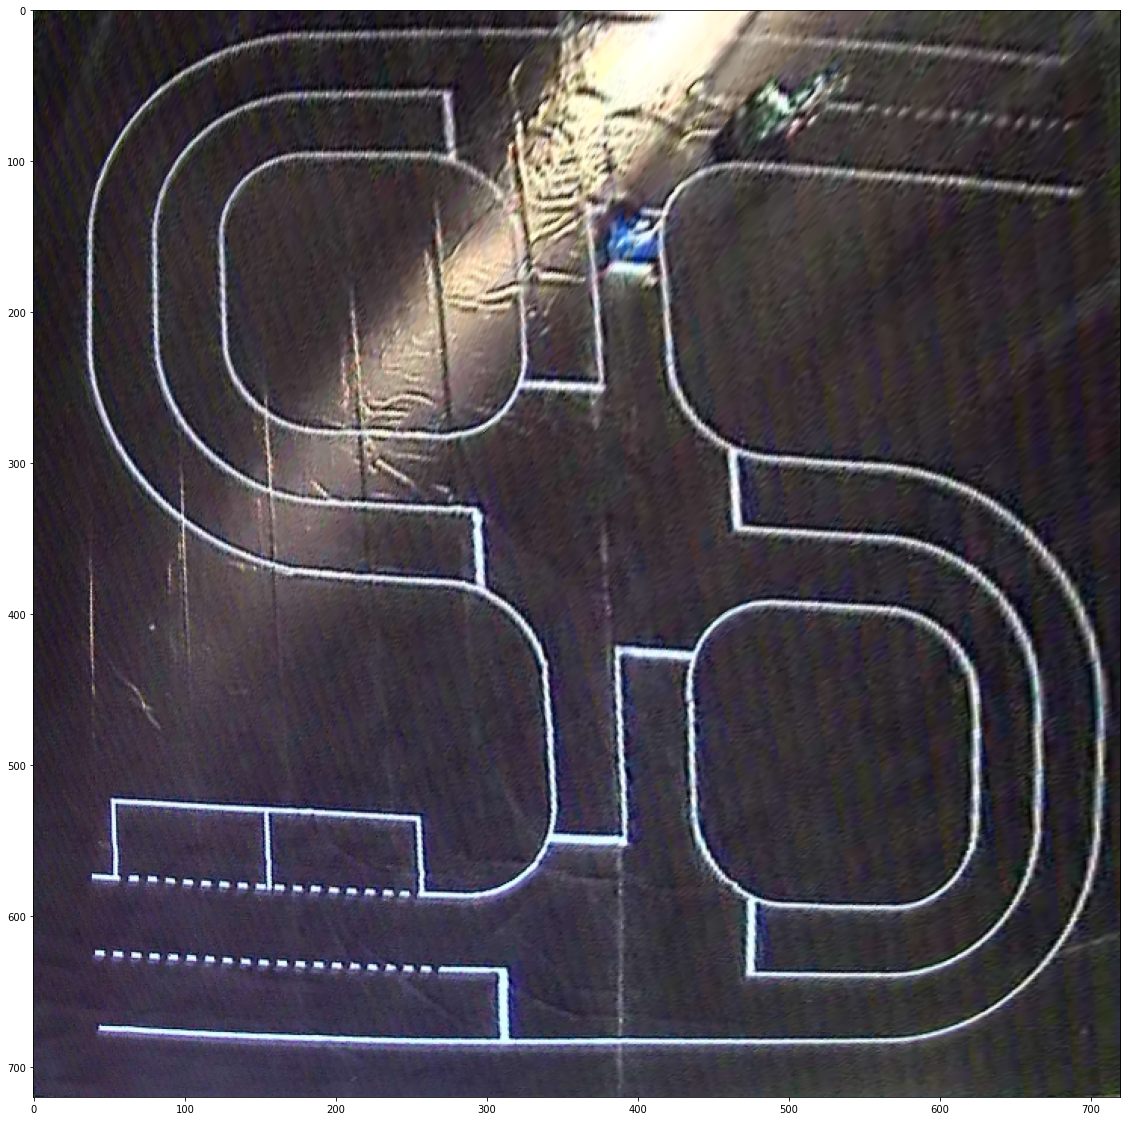

In [110]:
img1 = cv.imread("TrackImage.png")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

plt.figure(figsize= (20,20))
plt.imshow(img1)

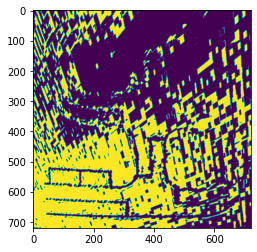

In [111]:
frame_HSV = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
frame_threshold = cv.inRange(frame_HSV, (150, 0, 0), (240, 255, 255))
plt.imshow(frame_threshold)

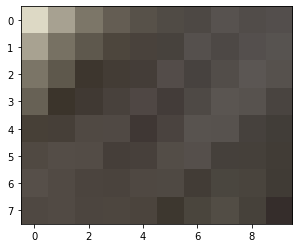

In [112]:
#plt.figure(figsize=(20,20))
from pprint import pprint
plt.imshow(img[160:168,400:410,:])
# pprint(frame_HSV[160:168,400:410,:])

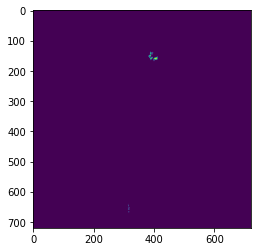

In [113]:
frame_threshold = cv.inRange(frame_HSV, (0, 150, 120), (30, 200, 200))
plt.imshow(frame_threshold)

In [128]:
def get_contour(img:np.ndarray) -> np.ndarray:
    kernel = np.ones((5,5), np.uint8)
    img_erosion = cv.erode(img, kernel, iterations=2)
    frame_HSV = cv.cvtColor(img_erosion, cv.COLOR_BGR2HSV)
    # (2, 29), (54, 255), (74, 255)
    frame_threshold = cv.inRange(frame_HSV, (2, 40, 74), (30, 255, 255))
    return frame_threshold

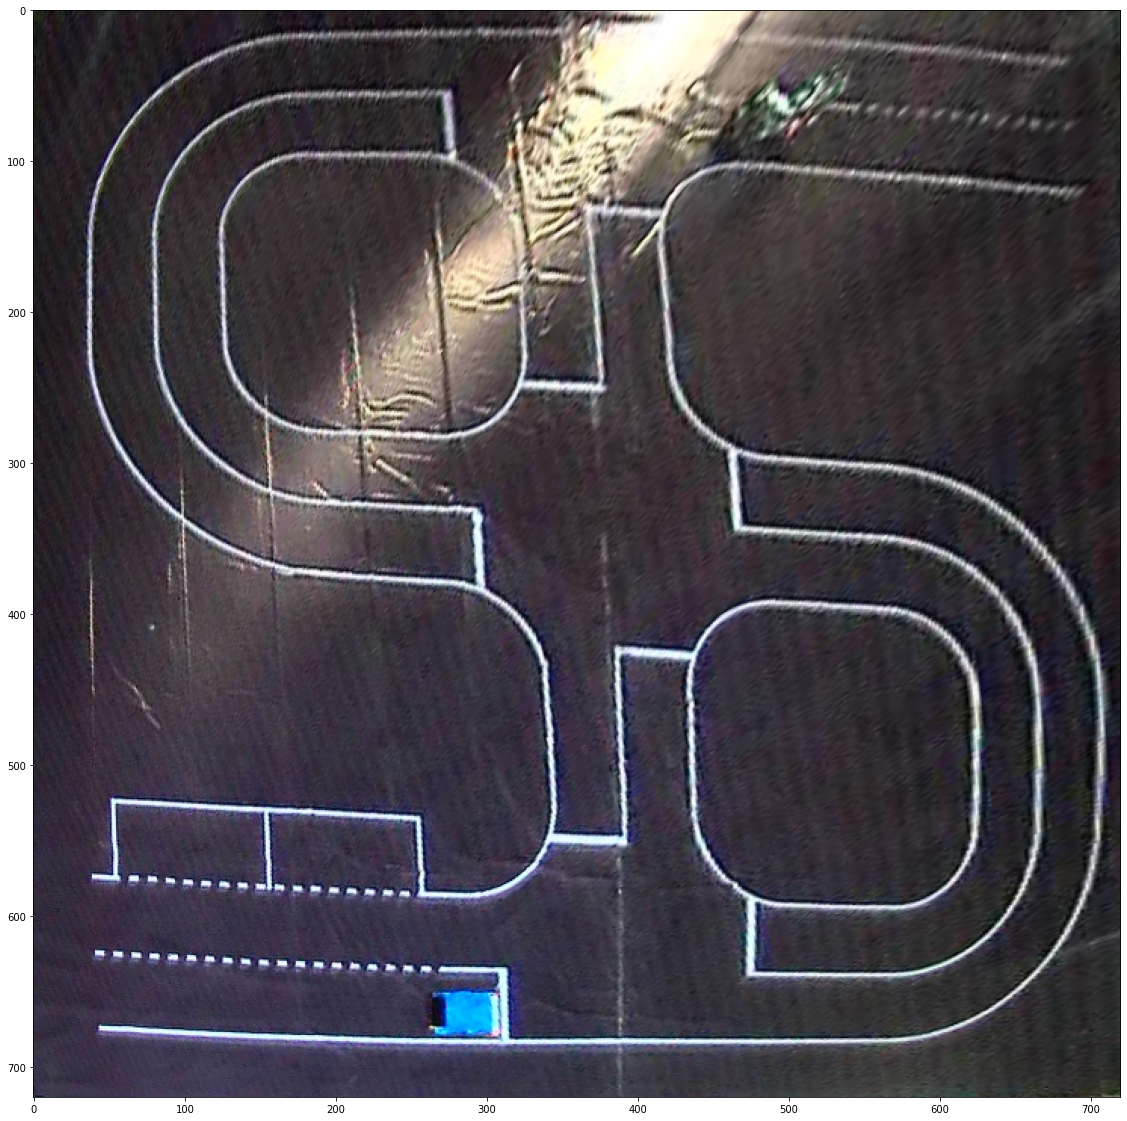

In [129]:
img2 = cv.imread("TrackImage2.png")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img2)

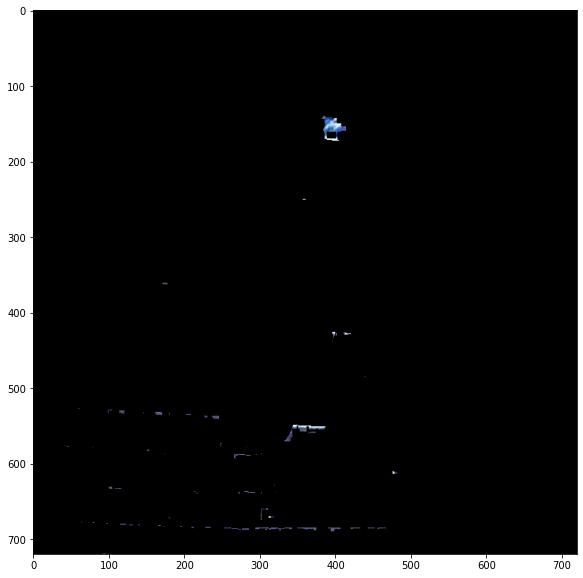

In [139]:
plt.figure(figsize=(10,10))
mask = get_contour(img1)
processed_img2 = cv.bitwise_and(img1,img1, mask=mask)
plt.imshow(processed_img2)


In [157]:
cnts = cv.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]


(382, 140)


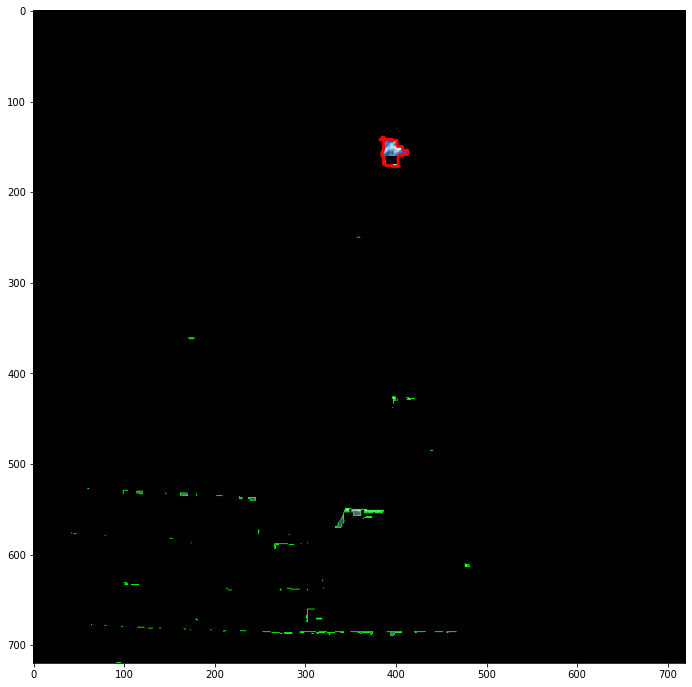

In [163]:
img = cv2.drawContours(processed_img2, cnts, -1, (0,255,0), 1)
max = 0
idx = -1
for i,c in enumerate(cnts):
    area = cv.contourArea(c)
    if area > max:
        idx = i
        max = area
blue_box = cnts[idx]
x,y,w,h = cv2.boundingRect(blue_box)
f_img = cv2.drawContours(processed_img2, [blue_box], -1, (255,0,0), 2)
plt.figure(figsize=(12,12))
plt.imshow(f_img)
print((x,y))

In [170]:
def loc_sys(img:np.ndarray) -> np.ndarray:
    # preprocess
    kernel = np.ones((5,5), np.uint8)
    img_erosion = cv.erode(img, kernel, iterations=2)
    frame_HSV = cv.cvtColor(img_erosion, cv.COLOR_BGR2HSV)
    # (2, 29), (54, 255), (74, 255)
    frame_threshold = cv.inRange(frame_HSV, (2, 40, 74), (30, 255, 255))
    processed_img2 = cv.bitwise_and(img1,img1, mask=frame_threshold)
    # get contours
    cnts = cv.findContours(frame_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    # find contour with max area
    max = 0
    idx = -1
    for i,c in enumerate(cnts):
        area = cv.contourArea(c)
        if area > max:
            idx = i
            max = area
    blue_box = cnts[idx]
    # return its center point
    x,y,w,h = cv2.boundingRect(blue_box)
    # f_img = cv2.drawContours(processed_img2, [blue_box], -1, (255,0,0), 2)
    # plt.figure(figsize=(12,12))
    # plt.imshow(f_img[100:200,350:450])
    return (x+w/2,y+h/2)

(398.0, 156.5)

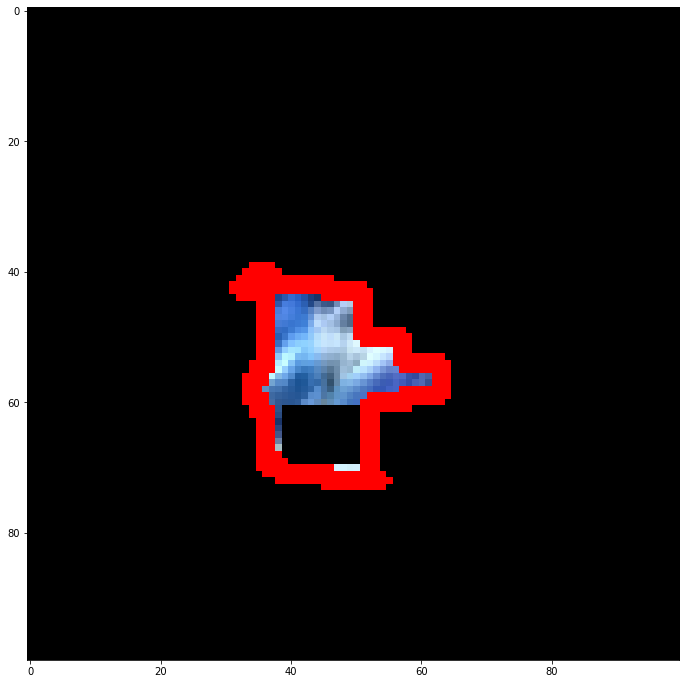

In [171]:
img1 = cv.imread("TrackImage.png")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
loc_sys(img1)